In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
M=nx.read_gml("polblogs.gml")

In [9]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)



### 1.  Create a nice looking graph of the political blog network

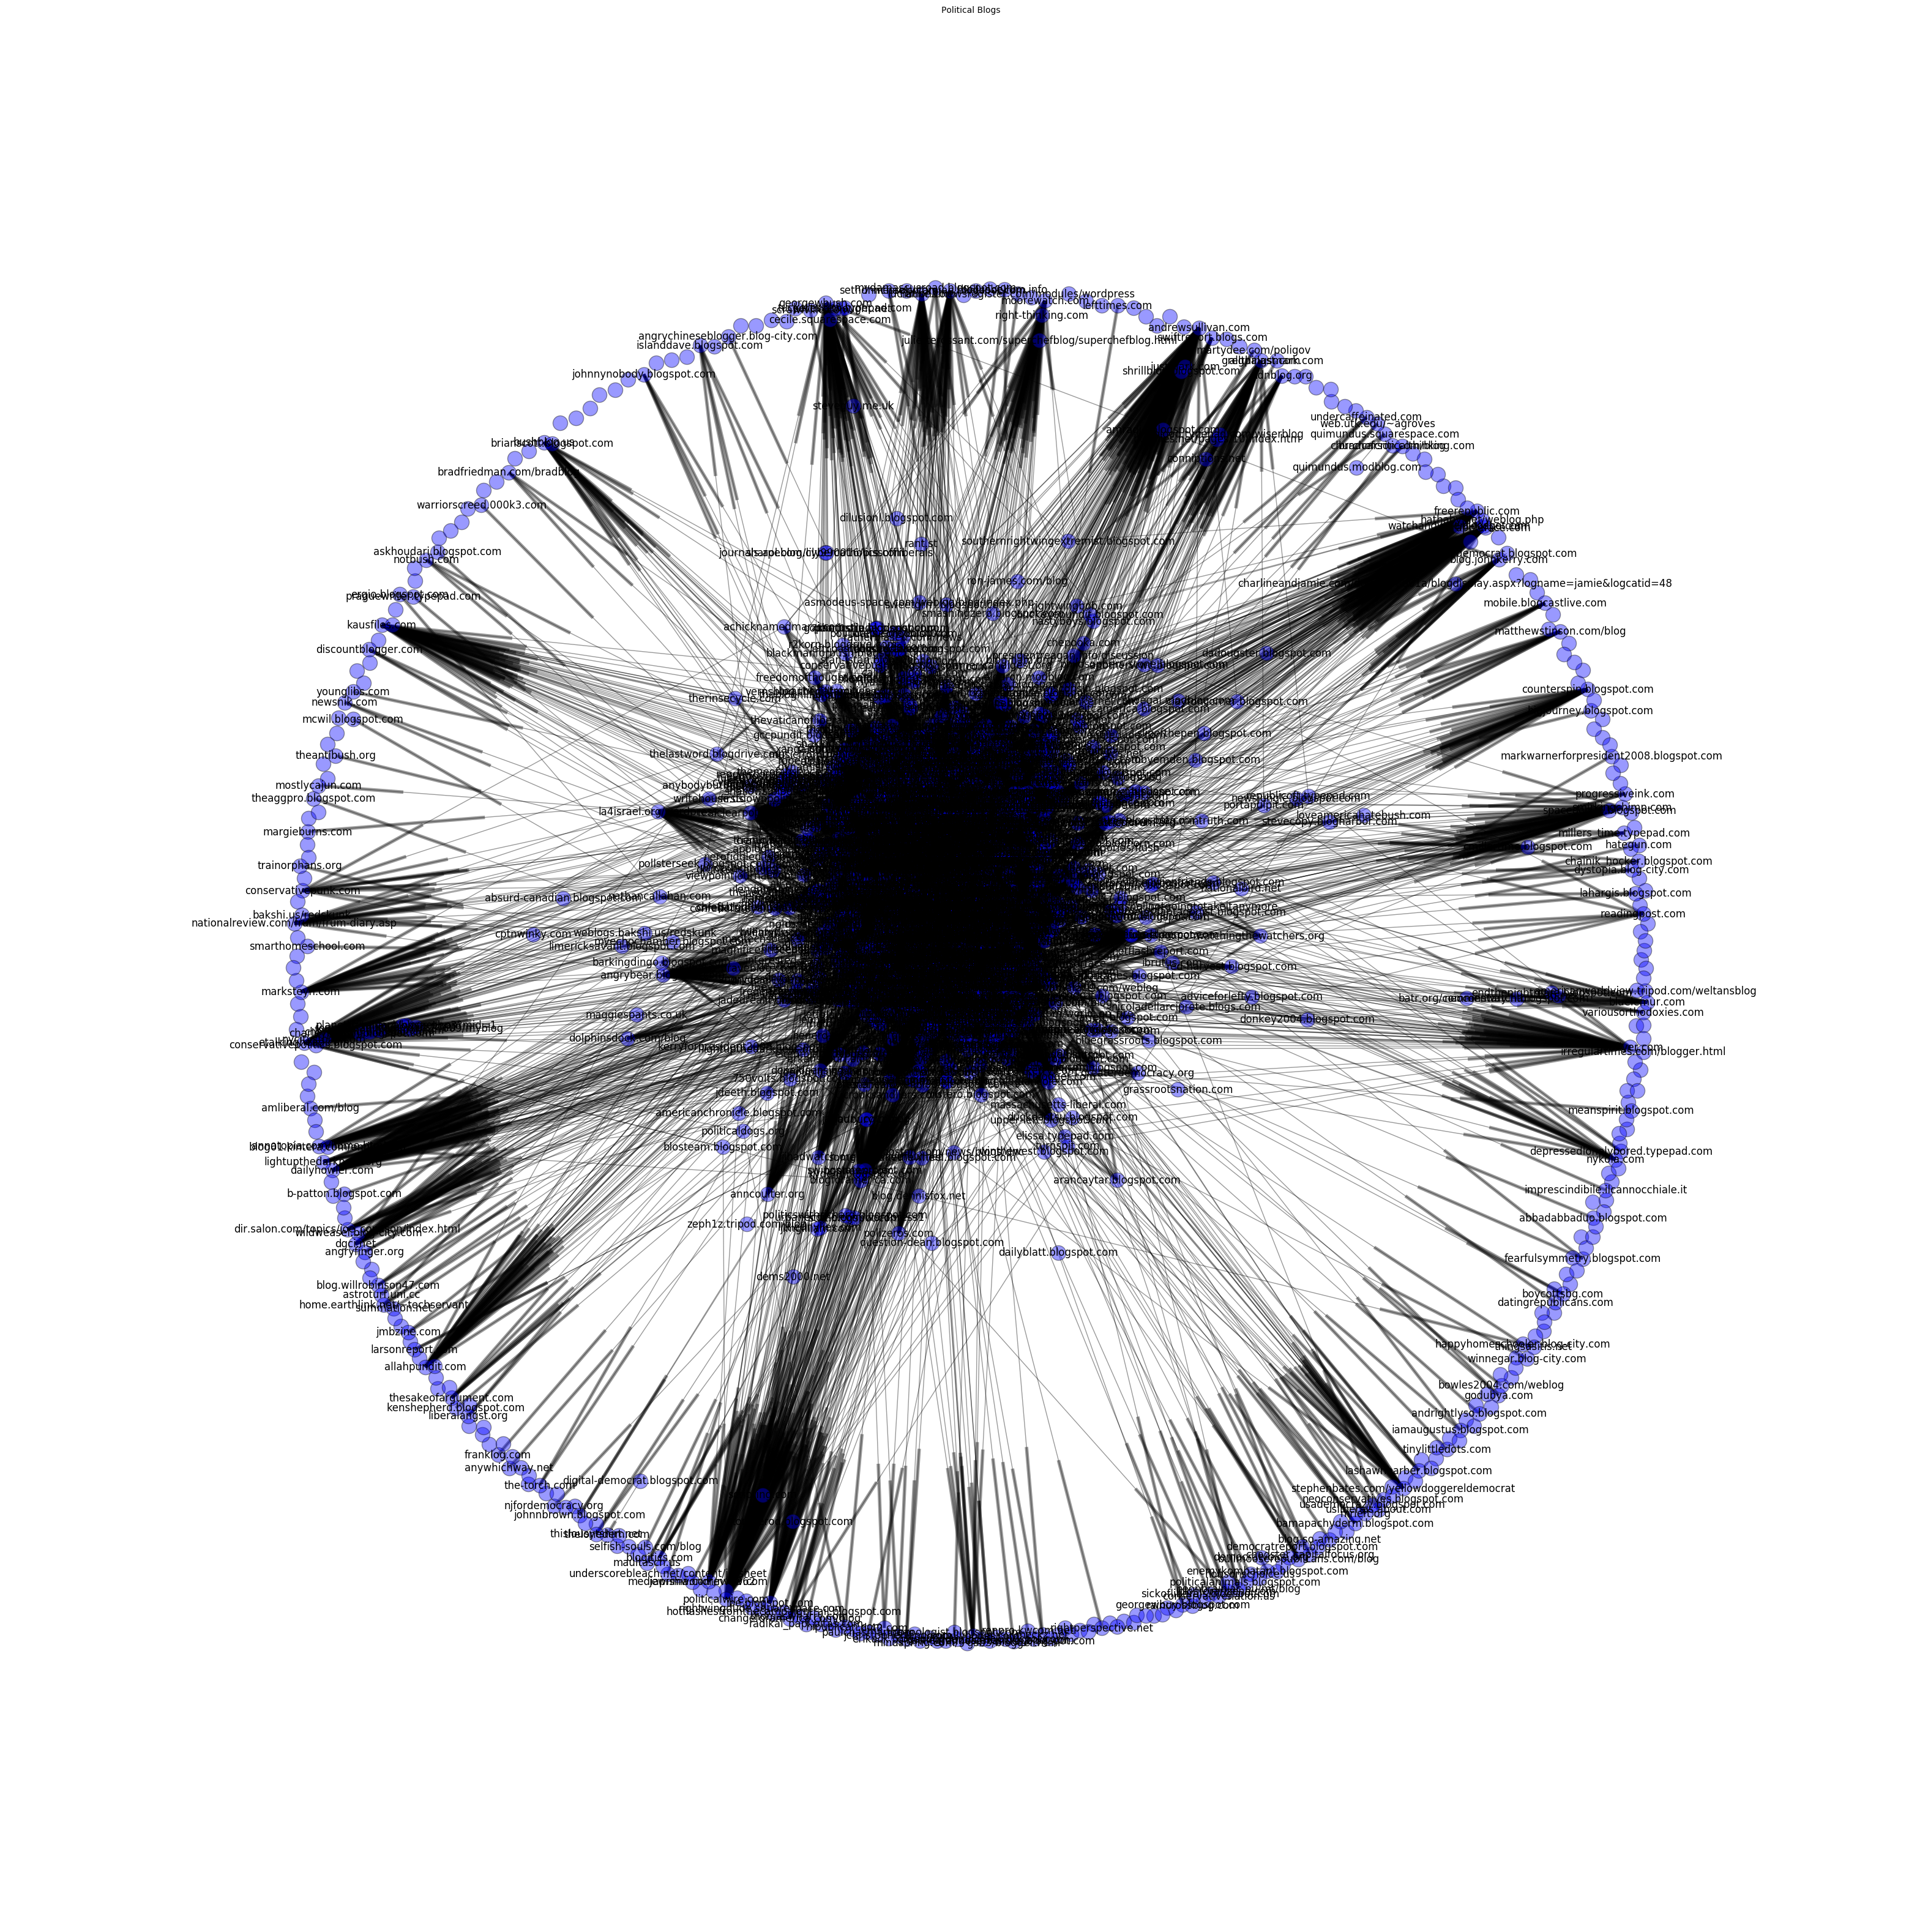

In [10]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(M ,iterations=500, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {    'color'      : 'k',
            'fontsize'   : 10}
plt.title("Political Blogs", font)

nx.draw_networkx_nodes(M,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(M,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

### 2.  What are the 10 most influential blogs?

In [11]:
centrality=nx.eigenvector_centrality(G)

In [12]:
blogsList = []
for node in centrality:
    blogsList.append((node,centrality[node]))
    
sortedblogsList = blogsList.sort(key=lambda x: x[1])

In [13]:
sorted(blogsList, key=lambda x: x[1], reverse=True)[:10]

[('atrios.blogspot.com', 0.19480797936637692),
 ('dailykos.com', 0.16089740205234815),
 ('washingtonmonthly.com', 0.14653924259836865),
 ('digbysblog.blogspot.com', 0.14264369221718307),
 ('bodyandsoul.typepad.com', 0.14113489174330346),
 ('liberaloasis.com', 0.1395237157110786),
 ('tbogg.blogspot.com', 0.13703641699824246),
 ('corrente.blogspot.com', 0.1294175927409614),
 ('talkingpointsmemo.com', 0.12700519780790936),
 ('dneiwert.blogspot.com', 0.1223756469254601)]

### 3.  What are the 10 least influential blogs?



In [14]:
sorted(blogsList, key=lambda x: x[1], reverse=False)[:10]

[('digital-democrat.blogspot.com', 1.7763251097559643e-72),
 ('thelonedem.com', 1.7763251097559643e-72),
 ('americanworldview.tripod.com/weltansblog', 7.491540638916238e-09),
 ('quimundus.modblog.com', 6.68292997500648e-08),
 ('batr.org/commentary.html', 6.795517611553999e-07),
 ('batr.net', 6.796325594929454e-07),
 ('democratvoice.org', 1.0233388204113294e-06),
 ('quimundus.squarespace.com', 6.061741218869527e-06),
 ('massachusetts-liberal.com', 9.483365235734498e-06),
 ('thingsasitis.net', 1.1736249650658603e-05)]

### 4.  Answer this question for both left wing and right wing blogs seperately.  (Optional 10 Extra Credit Points)